<div style="display:block">
    <div style="width: 20%; display: inline-block; text-align: left;">
        <div class="crop">
            <img src="https://media.licdn.com/dms/image/C510BAQHYx68wy1dIng/company-logo_400_400/0?e=1551916800&v=beta&t=ZPw68MeIuGLt9obXpIsiWiB1QcyaniHjGk9doyJulys" style="height:75px; margin-left:0px" />
        </div>
    </div>
    <div style="width: 59%; display: inline-block">
        <h1  style="text-align: center">Identify_Ordinal_Features</h1><br>
        <div style="width: 90%; text-align: center; display: inline-block;"><i>Author:</i> <strong>NetworthCorp</strong> </div>
    </div>
    <div style="width: 20%; text-align: right; display: inline-block;">
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Created: </i>
            <time datetime="Enter Date" pubdate>December, 2018</time>
        </div>
    </div>
</div>

## || Functionality:
__This Module enables user to Identify Ordinal Features in a Dataframe.__<br>
It plots a Bar Graph of all the Categorical Features and Save in a PNG Format to your Directory. 

## || Input Parameters:
* __source:__ It takes the Path or Name of the File..
* __comp_col:__ The column name from which the data will be compared.

## || Return:
__It returns the name of the Ordinal Columns in a Dataframe and Bar plot of all the Categorical Columns in a 'PNG' format.__

## || Code:

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def ordinal_var(source=None,comp_col=None):
    
    data=pd.read_csv(source)
    anova=pd.DataFrame(columns = ['Name','F_Value','P_Value'])
    i=0
    leng=len(data.select_dtypes(include=[np.object]).columns)
    x=math.ceil(math.sqrt(leng))
    plt.figure(figsize=(15, 15))
    for col in (data.select_dtypes(include=[np.object])): 
        i=i+1
        plt.subplot(x, x, i)
        plt.tight_layout()
        data.groupby([col])[comp_col].mean().sort_values(ascending=True).plot(kind='bar')

    plt.savefig('ordinal_var.png')
    
    for col in (data.select_dtypes(include=[np.object])):
        samples = (condition[1] for condition in data.groupby([col])[comp_col])
        f_val, p_val = stats.f_oneway(*samples)
        anova=anova.append({'Name': col,'F_Value':f_val,'P_Value':round(p_val,3) },ignore_index=True)
    
    ordinal=anova[anova['P_Value']<0.05]
    ordinal = ordinal.reset_index(drop=True)
    ordinal=ordinal['Name']
    return(ordinal)
        
    

## || Test 1:

0          MSZoning
1             Alley
2          LotShape
3       LandContour
4         LotConfig
5      Neighborhood
6        Condition1
7        Condition2
8          BldgType
9        HouseStyle
10        RoofStyle
11         RoofMatl
12      Exterior1st
13      Exterior2nd
14       MasVnrType
15        ExterQual
16        ExterCond
17       Foundation
18         BsmtQual
19         BsmtCond
20     BsmtExposure
21     BsmtFinType1
22     BsmtFinType2
23          Heating
24        HeatingQC
25       CentralAir
26       Electrical
27      KitchenQual
28       Functional
29      FireplaceQu
30       GarageType
31     GarageFinish
32       GarageQual
33       GarageCond
34       PavedDrive
35            Fence
36         SaleType
37    SaleCondition
Name: Name, dtype: object

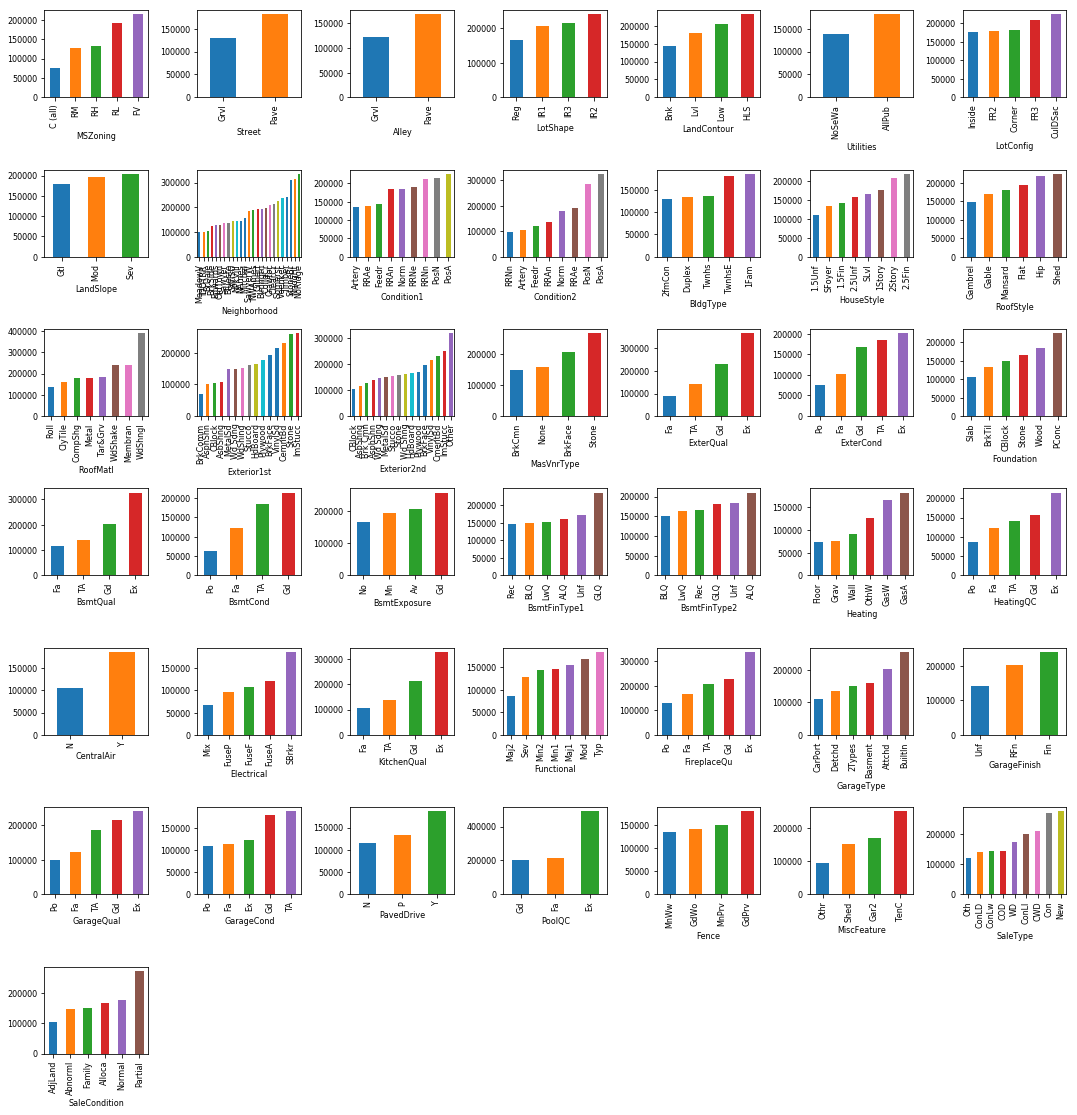

In [191]:
ordinal_var('home_pred_train.csv','SalePrice')

## || Test 2:

* __Note:__ Use Treated Datasets.<br>
<br>
This Dataset was Raw and contains NaN Values, So the output is not appropirate.

/opt/conda/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '
/opt/conda/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


0     InvestorsName
1    InvestmentType
2           Remarks
Name: Name, dtype: object

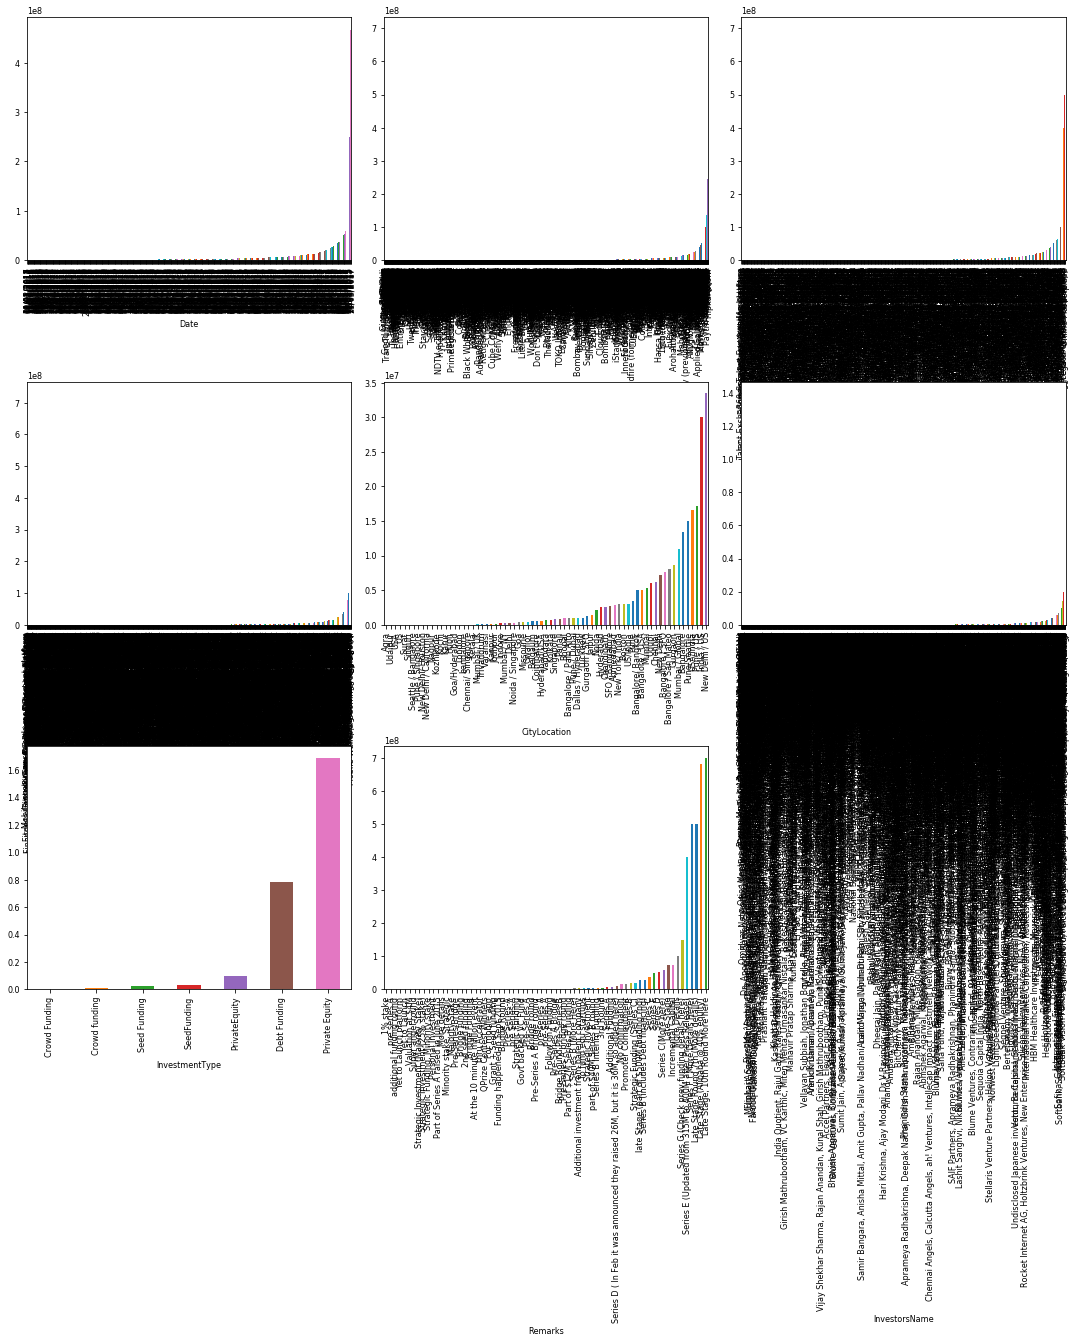

In [193]:
dta=pd.read_csv('startup_funding.csv', sep=',', thousands=',')
dta['AmountInUSD']=dta['AmountInUSD'].fillna(0)

ordinal_var(dta,'AmountInUSD')